In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Set random seed for reproducibility
torch.manual_seed(0)

# Torch version
torch.__version__

'2.0.0+cu118'

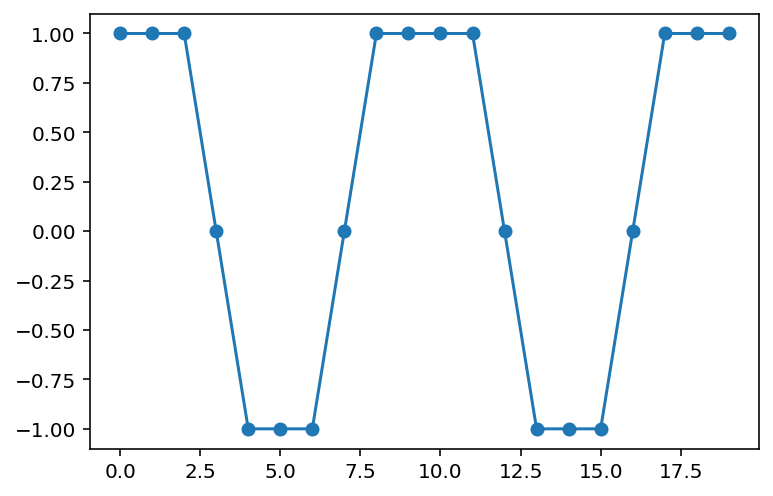

In [3]:
# Simple 1d dataset

y = torch.Tensor([1, 1, 1, 0, -1, -1, -1, 0, 1, 1, 1, 1, 0, -1, -1, -1, 0, 1, 1, 1])
x = torch.arange(0, len(y))

plt.plot(x, y, 'o-')

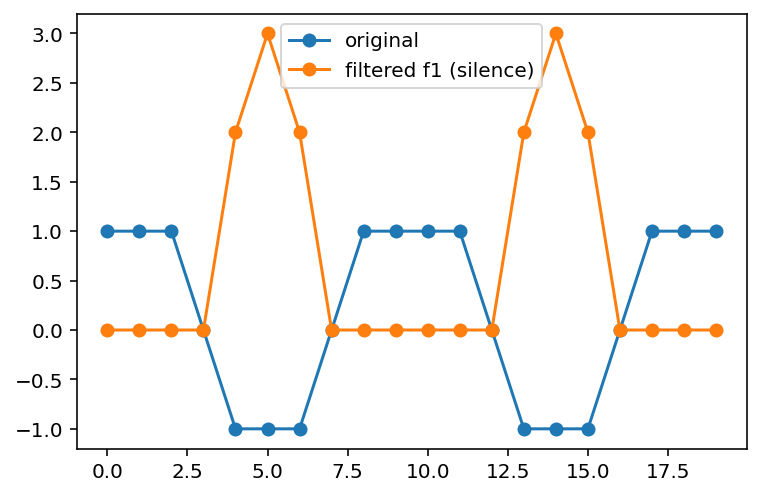

In [18]:
# Filter 1 (detect silence)

with torch.no_grad():
    f1 = nn.Conv1d(1, 1, 3, padding=1)
    f1.weight.data = torch.Tensor([[[-1, -1, -1]]])
    f1.bias.data = torch.Tensor([0])
    y1 = F.relu(f1(y.view(1, 1, -1))).view(-1)

plt.plot(x, y, 'o-', label='original')
plt.plot(x, y1, 'o-', label='filtered f1 (silence)')
plt.legend()

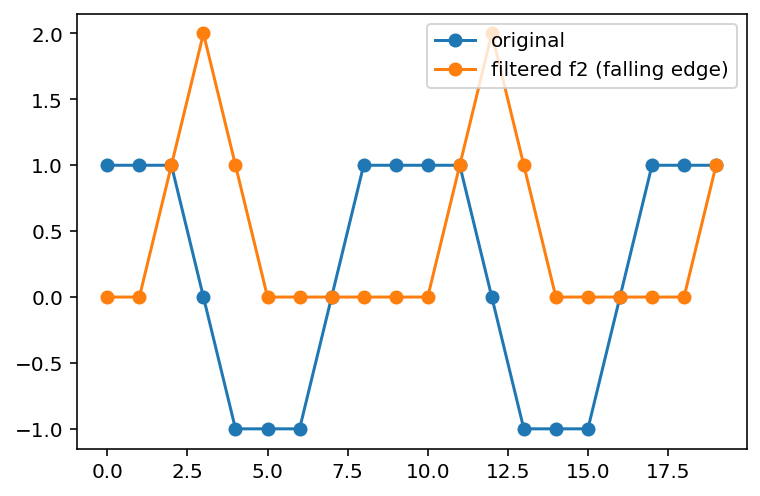

In [20]:
# Filter 2 (detect falling edge)

with torch.no_grad():
    f2 = nn.Conv1d(1, 1, 3, padding=1)
    f2.weight.data = torch.Tensor([[[1, 0, -1]]])
    f2.bias.data = torch.Tensor([0])
    y2 = F.relu(f2(y.view(1, 1, -1))).view(-1)

plt.plot(x, y, 'o-', label='original')
plt.plot(x, y2, 'o-', label='filtered f2 (falling edge)')
plt.legend()

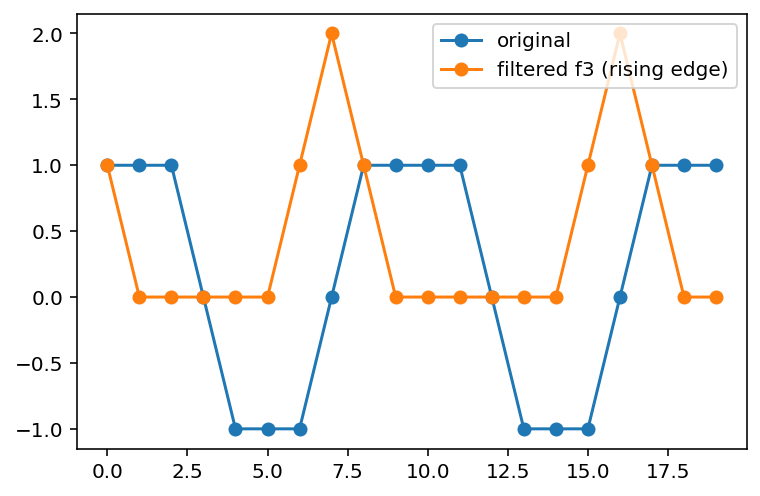

In [21]:
# Filter 3 (detect rising edge)

with torch.no_grad():
    f3 = nn.Conv1d(1, 1, 3, padding=1)
    f3.weight.data = torch.Tensor([[[-1, 0, 1]]])
    f3.bias.data = torch.Tensor([0])
    y3 = F.relu(f3(y.view(1, 1, -1))).view(-1)

plt.plot(x, y, 'o-', label='original')
plt.plot(x, y3, 'o-', label='filtered f3 (rising edge)')
plt.legend()

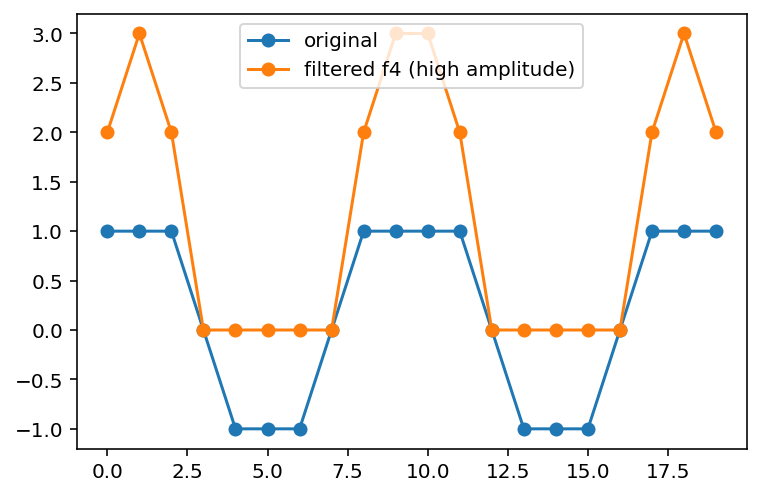

In [22]:
# Filter 4 (detect high amplitude)

with torch.no_grad():
    f4 = nn.Conv1d(1, 1, 3, padding=1)
    f4.weight.data = torch.Tensor([[[1, 1, 1]]])
    f4.bias.data = torch.Tensor([0])
    y4 = F.relu(f4(y.view(1, 1, -1))).view(-1)

plt.plot(x, y, 'o-', label='original') 
plt.plot(x, y4, 'o-', label='filtered f4 (high amplitude)')
plt.legend()